# DSGE Model

#### Dynamic IS:
$$ x_t = E_tx_{t+1}-\frac{1}{\sigma}(i_t-E_t\pi_{t+1}) $$

Where:

$x_t \equiv$ output gap at instant $t$

$i_t \equiv$ nominal interest rate at instant $t$

$\pi_t \equiv$ inflation rate at instant $t$

#### Phillips curve:
$$ \pi_t = \beta E_t\pi_{t+1} - \kappa x_t $$

Where:

$\kappa \equiv \lambda \left( \sigma + \frac{\phi+\alpha}{1-\alpha} \right)$

#### Monetary policy rule:
$$ i_t = \varphi_\pi \pi_t + \nu_t $$
$$ \nu_{t+1} = \rho \nu_t + v\varepsilon_{t+1}$$

Where:

$\varepsilon_t \sim N(0,1)$

---

## Log linear model

#### Blanchard Kahn
The model may be described by the following system of equations:


$$
\left\{\begin{matrix}
x_t &=& E_tx_{t+1}-\frac{1}{\sigma}(i_t-E_t\pi_{t+1}) \\ 
\pi_t &=& \beta E_t\pi_{t+1} + \kappa x_t \\
i_t &=& \varphi_\pi \pi_t + \nu_t\\
\nu_{t+1} &=& \rho \nu_t + v\varepsilon_{t+1}
\end{matrix}\right.
$$

$$\Leftrightarrow$$

$$
\left\{\begin{matrix}
\nu_{t+1} &&&& &=& \rho \nu_t &&&& &+& v\varepsilon_{t+1} \\
&&E_tx_{t+1} &+& \frac{1}{\sigma}E_t\pi_{t+1}   &=&\frac{1}{\sigma} \nu_t &+& x_t &+&\frac{\varphi_\pi}{\sigma} \pi_t && \\ 
&&&& \beta E_t\pi_{t+1} &=& && - \kappa x_t &+& \pi_t  &&
\end{matrix}\right.
$$

Or, in matrix notation:

$$
\left[\begin{matrix}
1 & 0 & 0 \\
0 & 1 & \frac{1}{\sigma} \\
0 & 0 & \beta
\end{matrix}\right]
\left[\begin{matrix}
\nu_{t+1} \\
E_tx_{t+1} \\
E_t\pi_{t+1}
\end{matrix}\right]
=
\left[\begin{matrix}
\rho & 0 & 0 \\
\frac{1}{\sigma} & 1 & \frac{\varphi_\pi}{\sigma} \\
0 & -\kappa & 1
\end{matrix}\right]
\left[\begin{matrix}
\nu_t \\
x_t \\
\pi_t
\end{matrix}\right]
+
\left[\begin{matrix}
v \\
0 \\
0
\end{matrix}\right]
\varepsilon_{t+1}
$$

$$\Leftrightarrow$$

$$ A_0
\left[\begin{matrix}
\omega_{t+1} \\
E_ty_{t+1}
\end{matrix}\right]
=
A_1
\left[\begin{matrix}
\omega_t \\
y_t
\end{matrix}\right]
+B\varepsilon_{t+1}
$$

Where $\omega_t$ is the $(p \times 1)$ vector that represents *predetermined variables*, and $y_t$ the $(k \times 1)$ vector that represents *forward-looking control variables*. In our case, $p=1$ and $k=2$.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

sigma = .5
beta = 0.15
rho = 0.8
phi_pi = 1.5
kappa = 1
v = 1

p = 1
k = 2

A0 = np.array([[1,0,       0],
               [0,1, 1/sigma],
               [0,0,    beta]])

A1 = np.array([[    rho,     0,           0],
               [1/sigma,     1,phi_pi/sigma],
               [      0,-kappa,           1]])

B = np.array([[v],
              [0],
              [0]])

Going further:

$$\left[\begin{matrix}
\omega_{t+1} \\
E_ty_{t+1}
\end{matrix}\right]
=
A_0^{-1}A_1
\left[\begin{matrix}
\omega_t \\
y_t
\end{matrix}\right]
+A_0^{-1}B\varepsilon_{t+1}
=
A
\left[\begin{matrix}
\omega_t \\
y_t
\end{matrix}\right]
+A_0^{-1}B\varepsilon_{t+1}
$$


*Jordan decomposition* of matrix $A=P\Lambda P^{-1}$ yields:
$$
\left[\begin{matrix}
\omega_{t+1} \\
E_ty_{t+1}
\end{matrix}\right]
=
P\Lambda P^{-1}
\left[\begin{matrix}
\omega_t \\
y_t
\end{matrix}\right]
+A_0^{-1}B\varepsilon_{t+1}
$$

$$\Leftrightarrow$$

$$
P^{-1}
\left[\begin{matrix}
\omega_{t+1} \\
E_ty_{t+1}
\end{matrix}\right]
=
\Lambda P^{-1}
\left[\begin{matrix}
\omega_t \\
y_t
\end{matrix}\right]
+P^{-1}A_0^{-1}B\varepsilon_{t+1}
$$

It is convenient to sort the eigenvalues in $\Lambda$. The **Blanchard Kahn** condition states that the number of eigenvalues in the unit circle must be greater or equal to $p$, i.e. the number of predetermined variables.

In [3]:
A = np.dot(np.linalg.inv(A0),A1)
Lambda,P = np.linalg.eig(A)

idx=Lambda.argsort()
Lambda = np.diag(Lambda[idx])
P = P[:,idx]

Then, we may split matrix $P^{-1}$ in four submatrixes:
$$P^{-1}=
\left[\begin{matrix}
P^*_{11} & P^*_{12} \\
P^*_{21} & P^*_{22}
\end{matrix}\right]
$$

Where $P^*_{11}$ is $(p \times p)$ and $P^*_{22}$ is $(k \times k)$, such that:
$$
\left[\begin{matrix}
\omega_{t+1}^* \\
E_ty_{t+1}^*
\end{matrix}\right]
= P^{-1}
\left[\begin{matrix}
\omega_{t+1} \\
E_ty_{t+1}
\end{matrix}\right]
$$

Therefore:
$$
\left[\begin{matrix}
\omega_{t+1}^* \\
E_ty_{t+1}^*
\end{matrix}\right]
= \Lambda
\left[\begin{matrix}
\omega_{t}^* \\
y_{t}^*
\end{matrix}\right]
+Q\varepsilon_{t+1}
$$

$$\Leftrightarrow$$

$$
\left\{\begin{matrix}
\omega_{t+1}^* &=& \Lambda_1 \omega_{t}^* + Q_1\varepsilon_{t+1} \\
E_ty_{t+1}^* &=& \Lambda_2 y_{t}^* + Q_2\varepsilon_{t+1}
\end{matrix}\right.
$$

Where $Q=P^{-1}A_0^{-1}B$, and $\Lambda$ and $Q$ are split in the same way as $P$.

In [4]:
invP = np.linalg.inv(P)

Pstar11 = invP[:p,:p]
Pstar12 = invP[:p,p:]
Pstar21 = invP[p:,:p]
Pstar22 = invP[p:,p:]

Lambda1 = Lambda[:p,:p]
Lambda2 = Lambda[p:,p:]

Q = np.dot(np.dot(invP,np.linalg.inv(A0)),B)
Q1 = Q[:p,:p]
Q2 = Q[p:,p:]

#### State space equations

The forecast in instant $t$ of $y^*_{t+j}$ is obtained recursevely from the second equation: 

$$
E_ty_{t+j}^* = \Lambda_2 E_ty_{t+j-1}^* + Q_2E_t\varepsilon_{t+j} = \Lambda_2 (\Lambda_2 E_ty_{t+j-2}^* + Q_2E_t\varepsilon_{t+j-1}) + Q_2E_t\varepsilon_{t+j} = \dots = \Lambda_2^{j-1}E_ty_{t+1}^*
$$

In the steady state $y^*_{t}=0$. From the definition of $y^*_{t}$, we have:
$$ y^*_{t}=0 \Rightarrow y^*_{t} = P^*_{21}\omega_t + P^*_{22}y_t = 0 $$
$$\Leftrightarrow$$
$$y_t= -{P^*_{22}}^{-1}P^*_{21}\omega_t$$

From the definition of $\omega^*_{t}$:
$$ \omega^*_{t} = P^*_{11}\omega_t + P^*_{12}y_t  = P^*_{11}\omega_t + P^*_{12} (-{P^*_{22}}^{-1}P^*_{21}\omega_t)$$
$$\Leftrightarrow$$
$$ \omega^*_{t} = (P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})\omega_t$$

From the first equation in the system:
$$ \omega^*_{t+1} = \Lambda_1 \omega_{t}^* + Q_1\varepsilon_{t+1}$$
$$\Rightarrow $$
$$(P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})\omega_{t+1} = \Lambda_1 (P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})\omega_t + Q_1\varepsilon_{t+1} $$
$$\Leftrightarrow $$
$$\omega_{t+1} = {(P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})}^{-1}\Lambda_1 (P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})\omega_t + {(P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})}^{-1}Q_1\varepsilon_{t+1} $$

Therefore, the equation in state space form is given by:

$$
\left\{\begin{matrix}
y_t &=& H \omega_{t}&& \\
\omega_{t+1} &=& F \omega_{t} &+& Q\varepsilon_{t+1}
\end{matrix}\right.
$$

Where

$H \equiv -{P^*_{22}}^{-1}P^*_{21}$

$F \equiv {(P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})}^{-1}\Lambda_1 (P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})$

$Q \equiv {(P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})}^{-1}Q_1$

Memo:

$\omega_{t} = \begin{bmatrix}\nu_{t}\end{bmatrix}$

$y_{t} = \begin{bmatrix}x_{t} \\ \pi_{t}\end{bmatrix}$

In [5]:
H = -np.dot(np.linalg.inv(Pstar22),Pstar21)
F = np.dot(np.dot(np.linalg.inv(Pstar11 - np.dot(np.dot(Pstar12,np.linalg.inv(Pstar22)),Pstar21)),Lambda1),Pstar11 - np.dot(np.dot(Pstar12,np.linalg.inv(Pstar22)),Pstar21))
Q = np.dot(np.linalg.inv(Pstar11 - np.dot(np.dot(Pstar12,np.linalg.inv(Pstar22)),Pstar21)),Q1)

H,F,Q

(array([[-1.11675127],
        [-1.26903553]]), array([[ 0.8]]), array([[ 1.]]))

# Kalman Filter

A general linear Gaussian state space model can be written as follows:

$$
\left\{\begin{matrix}
y_t &=& H_tx_t+\eta_t &,&\eta_t \sim N(0,R_t)\\
x_{t+1} &=& F_tx_t+\varepsilon_t &,&\varepsilon_t \sim N(0,Q_t)\\
\end{matrix}\right.
$$

Where $y_t(p\times 1)$ is the *observation vector*, $x_t(m\times 1)$ is the *state vector*. The matrices $H_t$, $F_t$, $R_t$ and $Q_t$ are initially assumed to be known. The matrices $\eta_t$ and $\varepsilon_t$ are serially independent and independent of each other for all $t$.


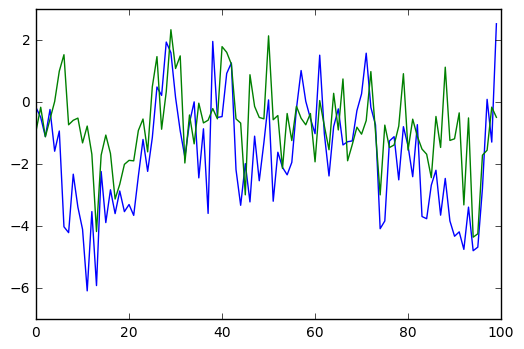

In [7]:
# Gera dados aleatorios
## Define as matrizes H(p x m), R(p x p) F(m x m), Q(m x m)
H = np.array([[1,0,1],
              [1,0,0]])

R = np.array([[1,0],
              [0,1]])

F = np.array([[.5,.25,.25],
              [ 0,.75,.25],
              [ 0,  0,  1]])

Q = np.array([[.5,    0,  0],
              [ 0,0.001,  0],
              [ 0,    0,.25]])

## Define intervalo de tempo
T = 100

## Constroi serie de dados que respeita a estrutura do modelo
m = H.shape[1]
p = H.shape[0]

y = np.array([[0.0 for i in range(p)] for t in range(T)])
x = np.array([[0.0 for i in range(m)] for t in range(T)])
    
for t in range(T):
    if p==1:
        y[t] = np.dot(H,x[t]) + np.random.normal(0,R)
    else:
        y[t] = np.dot(H,x[t]) + np.random.multivariate_normal(np.zeros(p),R)
        
    if t+1<T:
        if m==1:
            x[t+1] = np.dot(F,x[t]) + np.random.normal(0,Q)
        else:
            x[t+1] = np.dot(F,x[t]) + np.random.multivariate_normal(np.zeros(m),Q)

for i in range(p):
    plt.plot(range(T),[y[t,i] for t in range(T)])

#### Implementation
Let $a_{T|t} \equiv \mathbb{E}(x_T|y_{1:t})$ and $V_{T|t} \equiv \mathbb{V}(x_T|y_{1:t})$. Then:
$$
\begin{matrix}
a_{t+1|t} &=& \mathbb{E}(x_{t+1}|y_{1:t}) = \mathbb{E}(F_tx_{t}+\varepsilon_t|y_{1:t}) &=& F_ta_{t|t}
\\
V_{t+1|t} &=& \mathbb{V}(x_{t+1}|y_{1:t})= \mathbb{V}(F_tx_{t}+\varepsilon_t|y_{1:t}) &=& F_tV_{t|t}F_t'+Q_t
\end{matrix}
$$

Let $\nu_t\equiv y_t-H_ta_{t|t-1}$ be the predicion error. Then, starting from $a_{1|0}$ and $V_{1|0}$ we can recursevely calculate the filter *update equations*:

$$
\begin{matrix}
\nu_t &=& y_t-H_ta_{t|t-1}
\\
S_t &=& H_tV_{t|t-1}H_t'+R_t
\\
K_t &=& V_{t|t-1}H_t'S_t^{-1}
\\
a_{t|t}&=&a_{t|t-1}+K_t\nu_t
\\
V_{t|t} &=& (I_m-K_tH_t)V_{t|t-1}
\end{matrix}
$$

Where $K_t$ is the **Kalman filter gain**.

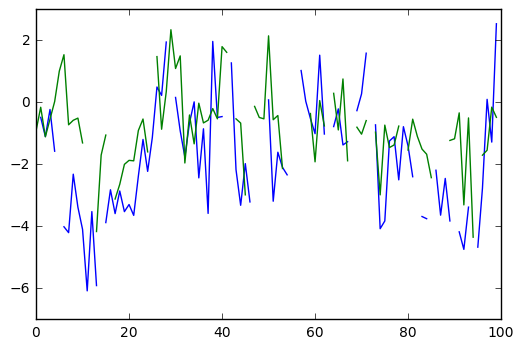

In [26]:
# Calcula Filtro de Kalman
# Memo: toma como dados y, H, R, F e Q

T = 100
m = H.shape[1]
p = H.shape[0]

# Remove pontos aleatoriamente das series de dados
missProb = 0.2
yTest = np.array(y)
for t in range(T):
    for i in range(p):
        if np.random.rand(1)<missProb:
            yTest[t][i] = np.nan

for i in range(p):
    plt.plot(range(T),[yTest[t,i] for t in range(T)])

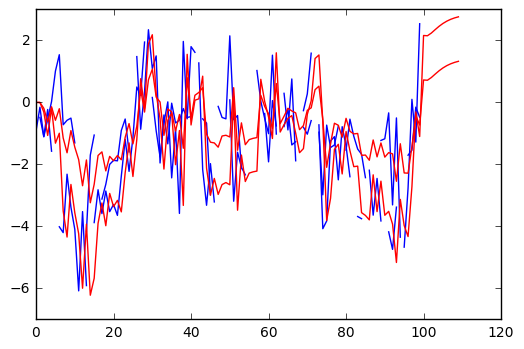

In [27]:
# Define horizonte de projecao
forecast = 10

# Define variaveis de interesse
yHat = np.array([[0.0 for i in range(p)] for t in range(T+forecast)])
yFull = np.append(np.array(yTest),np.array([[np.nan for i in range(p)] for t in range(forecast)]),axis=0)

nu = np.array([[0.0 for i in range(p)] for t in range(T+forecast)])
a = np.array([[0.0 for i in range(m)] for t in range(T+forecast)])
aMinus = np.array([[0.0 for i in range(m)] for t in range(T+forecast+1)])

S = np.array([[[0.0 for i in range(p)] for j in range(p)] for t in range(T+forecast)])
V = np.array([[[0.0 for i in range(m)] for j in range(m)] for t in range(T+forecast)])
VMinus = np.array([[[0.0 for i in range(m)] for j in range(m)] for t in range(T+forecast+1)])
K = np.array([[[0.0 for i in range(p)] for j in range(m)] for t in range(T+forecast)])

# Calcula filtro recursivamente
for t in range(T+forecast):
    # Filtered values
    yHat[t] = np.dot(H,aMinus[t])
    
    for i in range(p):
        if np.isnan(yFull[t][i]):
            yFull[t][i] = yHat[t][i]
    
    # Update equations
    nu[t] = yFull[t] - np.dot(H,aMinus[t])
    S[t] = np.dot(np.dot(H,V[t]),np.transpose(H))+R
    K[t] = np.dot(np.dot(VMinus[t],np.transpose(H)),np.linalg.inv(S[t]))
    a[t] = aMinus[t] + np.dot(K[t],nu[t])
    V[t] = np.dot((np.identity(m)-np.dot(K[t],H)),VMinus[t])
    
    # Forecast equations
    aMinus[t+1] = np.dot(F,a[t])
    VMinus[t+1] = np.dot(np.dot(F,V[t]),np.transpose(F))+Q

# Plot
plt.plot(range(T),yTest,'blue')
plt.plot(range(T+forecast),yHat,'red')

#### Likelihood
The likelihood can be expressed as:
$$
f(y_{1:T}) = \prod^T_{t=1}f(y_t|y_{1:t-1})
$$

Where $f(y_1|y_{0:1})\equiv f(y_1)$. From the properties of the filter, we can go further:
$$
\log f(y_{1:T}) = -\frac{Tp}{2} \log2\pi-\frac{1}{2}\sum^T_{t=1}(log|S_t|+\nu_t'S_t^{-1}\nu_t)
$$


In [28]:
# Calcula a likelihood
L = 0.0
for t in range(T):
    L = L + np.linalg.det(S[t]) + np.dot(np.dot(np.transpose(nu[t]),np.linalg.inv(S[t])),nu[t])
    
L = -T*p/2* np.log(2*np.pi) - 1/2 * L
L

-409.46557503663183